# Исследование определяющий успешность игры закономерности.
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

<span style="background-color: #D3D3D3">Name</span> — название игры

<span style="background-color: #D3D3D3">Platform</span> — платформа

<span style="background-color: #D3D3D3">Year_of_Release</span> — год выпуска

<span style="background-color: #D3D3D3">Genre</span> — жанр игры

<span style="background-color: #D3D3D3">NA_sales</span> — продажи в Северной Америке (миллионы проданных копий)

<span style="background-color: #D3D3D3">EU_sales</span> — продажи в Европе (миллионы проданных копий)

<span style="background-color: #D3D3D3">JP_sales</span> — продажи в Японии (миллионы проданных копий)

<span style="background-color: #D3D3D3">Other_sales</span> — продажи в других странах (миллионы проданных копий)

<span style="background-color: #D3D3D3">Critic_Score</span> — оценка критиков (максимум 100)

<span style="background-color: #D3D3D3">User_Score</span> — оценка пользователей (максимум 10)

<span style="background-color: #D3D3D3">Rating</span> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

## Изучаем общую информацию о данных

In [1]:
# импорт библиотеки pandas
import pandas as pd

In [2]:
# импорт библиотеки numpy
import numpy as np

In [3]:
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt

In [4]:
# чтение файла с данными и сохранение в data
data = pd.read_csv('/datasets/games.csv')

In [5]:
#получение первых 10 строк таблице
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
# выводим общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод**

Из информации о данных видно, что в них присутвуют пропуски и есть данные тип которых не подходит для анализа.

## Предобработка данных

In [7]:
#приводим навзание столбцов к нижнему регистору
data.columns = data.columns.str.lower()

In [8]:
#подсчёт пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
# подсчёт явных дубликатов
data.duplicated().sum()

0

Оценка критиков и год выпуска представленны как число с плавующей точкой, но в данных это целые числа, поэтому есть смысл поменять их на целые числа для удобства.

In [10]:
# преобразуем год выпуска и оценку критиков в целый тип данных
data[['year_of_release', 'critic_score']] = data[['year_of_release', 'critic_score']].astype('Int64')

In [11]:
# заменяем значение 'tbd' в оценке пользователей на пропуски
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

Оценка пользователя была в текстовом типе данных , но в таблице данные представленны как число с плавующей точкой, меняем тип для удобства анализа

In [12]:
# преобразуем оценку пользователей в число с плавающей точкой
data['user_score'] = data['user_score'].astype('float32')

In [13]:
# заменяем пропуски на неизвестно
data['name'] = data['name'].fillna('unknown')

In [14]:
# заменяем пропуски на неизвестно
data['genre'] = data['genre'].fillna('unknown')

In [15]:
# заменяем пропуски на неизвестно
data['rating'] = data['rating'].fillna('unknown')

In [16]:
# убираем пропуски в годе выпуска
data = data.dropna(subset=['year_of_release'])

**Объяснение замены пропусков**   
   Заменил пропуски в строке рейтинг на неизвестно, так как другой какой либо вменяемой замены, а данных много чтобы избавиться от них.
   
   Название игры и платформы заменил на неизвестно, так как это не помешает исследованию, а от лишних данных избавляться не желательно.
   
   Убрал строки где пропущен год релиза, удачной замены для этого значения найти невозможно и так как процент пропусков от всего Датафрейма 1% удалил их.
   
   Пропуски с оценкой критиков и пользователей отсавил не тронутыми, так как некоректно заполнять медианной или средним потому что оценка это субъективное мнение.
   
   

**Объяснение появление пропусков** 
   
   Пропуски с оценкой пользователей и критиков появились из за того, что люди забыли поставить оценку либо игра старая и уже неактуально её обозревать и ставить оценки.
   
   Пропуски в рейтинге появились из за наличия старых игр для которых не проставляли на то время рейтинг и из за игр с маленькими продажами.


   Пропуски в остальных данных появились в связи в системе.

**Аббревиатура 'tbd' в столбце с оценкой пользователей** 

   Такая аббревиатура появлется когда пользователь ещё не поставил оценку и ещё в процессе формирование своего отзыва, такие значения было решено заменить на пропуски, потому что ставить какое либо значение не имеет смысла, таким образовом  мы решаем за пользователя, что поменшает трезво оценить ситуацию.

In [17]:
# проверяем на неявные дупбликаты столбец рейтинга
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [18]:
# проверяем на неявные дупбликаты столбец платформы
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [19]:
# проверяем на неявные дупбликаты столбец жанр игры
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'unknown'], dtype=object)

In [20]:
# проверяем на неявные дупбликаты столбец навзания игры
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [21]:
# добавляем новый столбец с суммой прожад со всех регионов
data['total_sales'] = data['na_sales']+ data['eu_sales'] +data['jp_sales']+data['other_sales']


## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Text(0, 0.5, 'Количество игр')

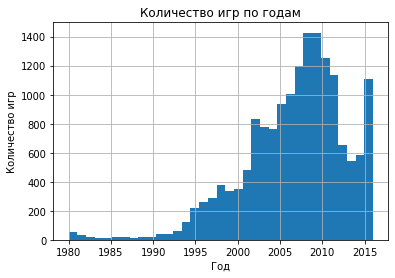

In [22]:
# строим гистограмму по дате релиза игр
data['year_of_release'].hist(bins = 35)
plt.title('Количество игр по годам')
plt.xlabel ('Год')
plt.ylabel ('Количество игр')

**Выпуск игр в разные года**
   
   Данные до 1993 года можно не так важны так как игры не так активно выпускались, самый важный период начался с 2003 по 2011

### Как менялись продажи по платформам и за какой характерный срок появляются новые и исчезают старые платформы

In [23]:
#строим таблицу продаж по всем платформам
sum_price_platform = data.pivot_table(
    index='platform', values='total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
all_platform = sum_price_platform.reset_index()
sum_price_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [24]:
# берем 10 самых прибыльных платформ
top_platform = all_platform['platform'].head(10)

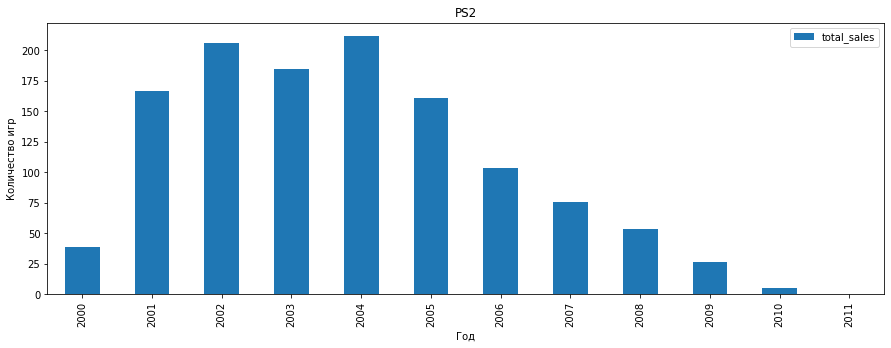

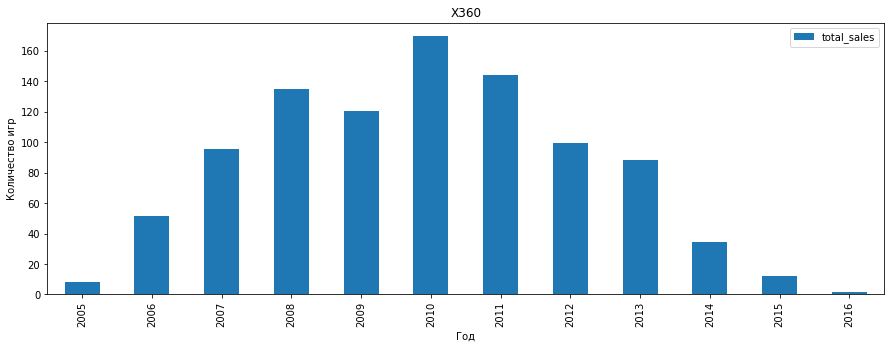

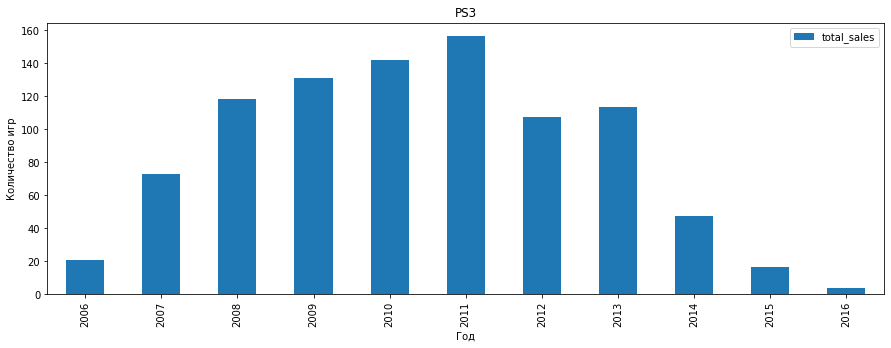

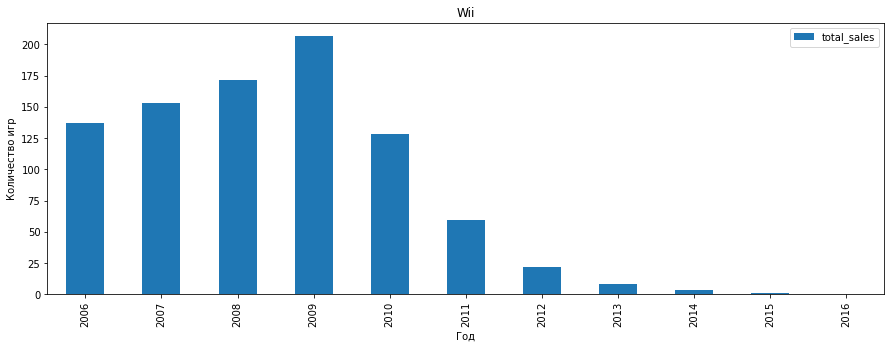

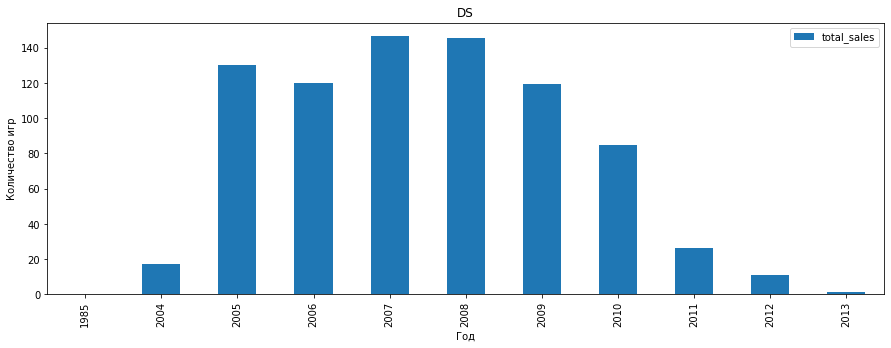

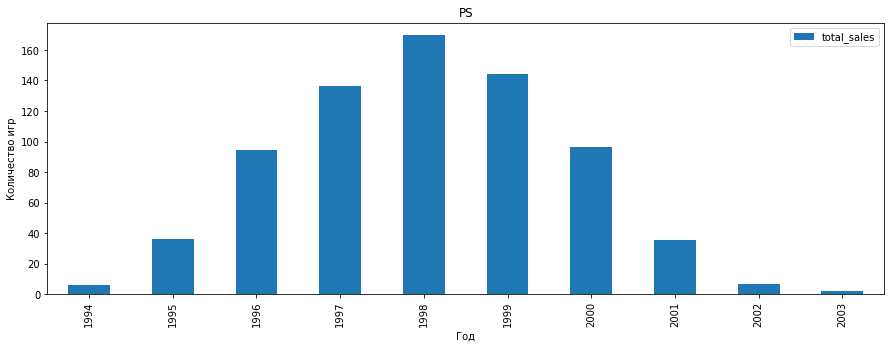

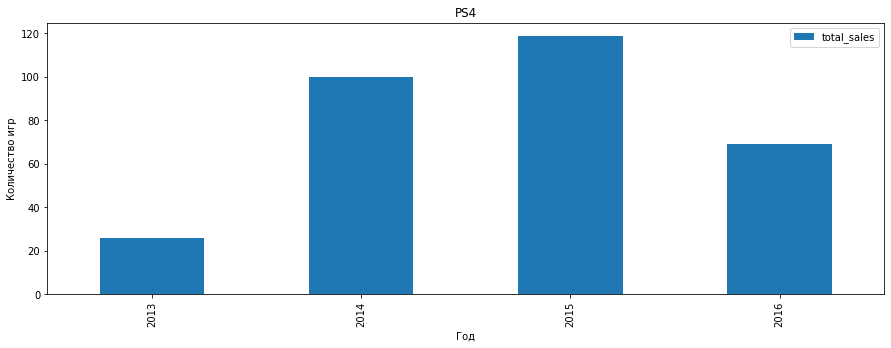

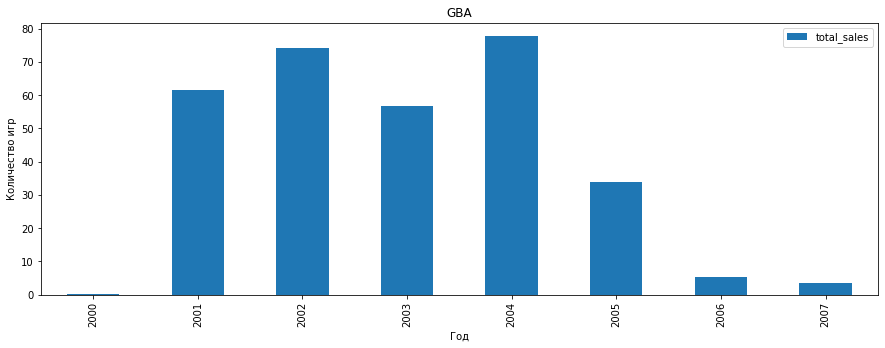

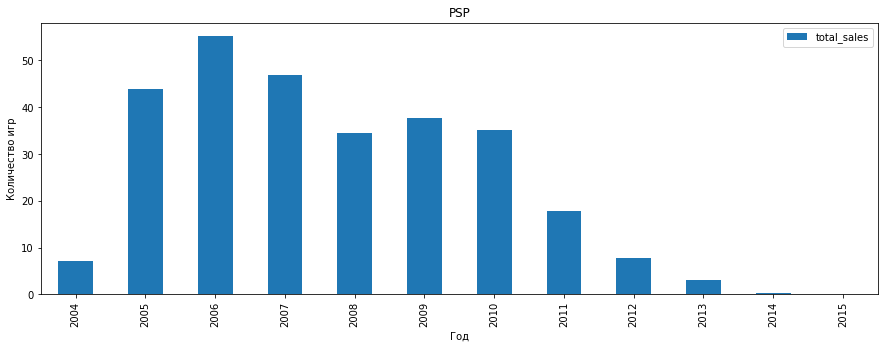

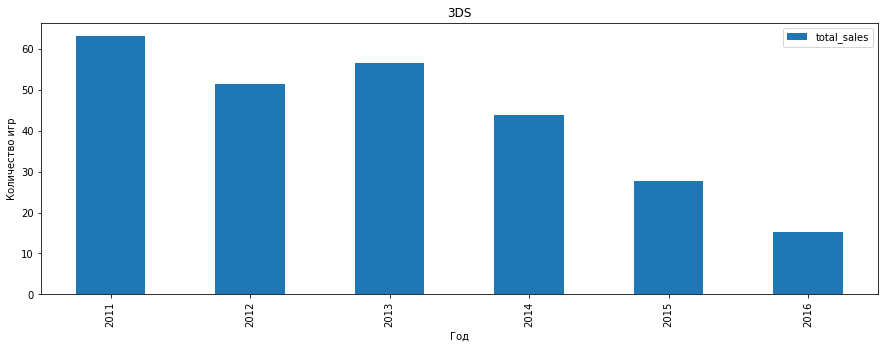

In [25]:
# строим гистограммы дял каждой платформы по годам
for platform in top_platform:
    data[data['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize=(15,5))
    plt.title(platform)
    plt.xlabel ('Год')
    plt.ylabel ('Количество игр')

**Характерный срок появление и исчезновения консолей**
   
   Делая выводы из графиков которые мы получили, можно сказать, что консоли живут в среднем 8-9 лет после релиза.

### Актуальный период для исследования

In [26]:
#отрезаем датафрейм по акутальной дате для исследования
current_period = data.query('year_of_release >= 2014')


### Потенциально прибыльные платформы

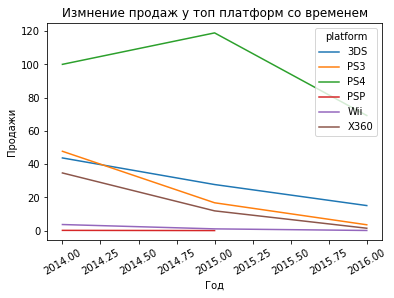

In [27]:
#график с изменение продаж у каждой из платформ

current_period.query('platform in @top_platform').pivot_table(index = 'year_of_release',columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot()
plt.title('Измнение продаж у топ платформ со временем')
plt.xlabel ('Год')
plt.ylabel ('Продажи')
plt.xticks(rotation=30)
plt.show()

**Потенциально прибыльная платформа**
   
   Исходя из полученных данных можно сделать вывод, что у многих платформ доход стремится к нулю, но из всех них выбивается PS4, так как консоль появилась недавно на рынке, она и является потециально прибольной платформой

### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

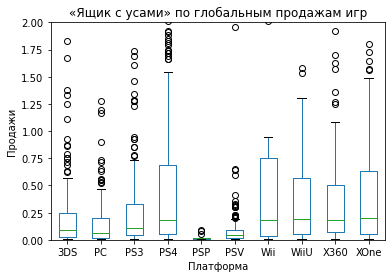

In [28]:

current_period.pivot_table(index = 'name',columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box',ylim=(0,2))
plt.title('«Ящик с усами» по глобальным продажам игр')
plt.xlabel ('Платформа')
plt.ylabel ('Продажи')

plt.show()

Посмотрим график поближе

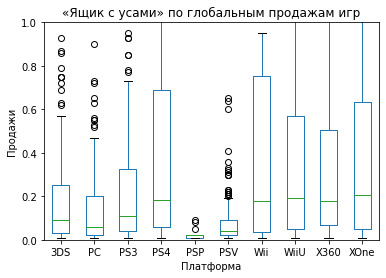

In [29]:
current_period.pivot_table(index = 'name',columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box',ylim=(0,1))
plt.title('«Ящик с усами» по глобальным продажам игр')
plt.xlabel ('Платформа')
plt.ylabel ('Продажи')
plt.show()

**Вывод по 'ящику с усами'**
   
   Можно заметить, что ХOne имеет хорошие продажи на равне с PS4 поэтому эту платформу тоже можно внести в потенциально прибольную. 
   
   Так же можно наблюдать что платформы предыдущих поколение X360 и PS3 имеют хорошие продажи, но их уже догоняет будущие поколение платформ, по медианнам проджа они почти сровнялись.
   
   Платформа WiiU имеет хорошие продажи и обгоняет своё предыдущие поколение Wii. 

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

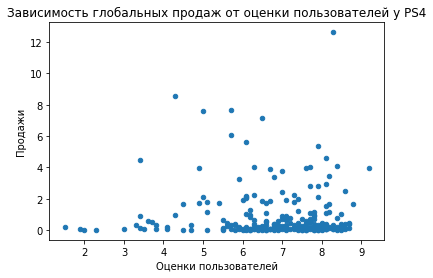

In [30]:
#диаграмма рассеяния по PS4
current_period.query('platform == "PS4"').plot(kind = 'scatter',x='user_score',y='total_sales')
plt.title('Зависимость глобальных продаж от оценки пользователей у PS4')
plt.xlabel ('Оценки пользователей')
plt.ylabel ('Продажи')
plt.show()

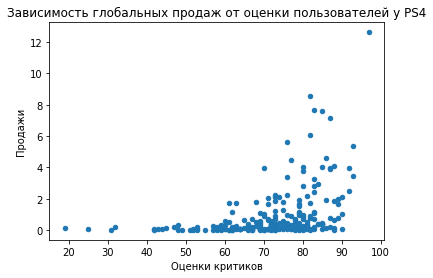

In [31]:
current_period.query('platform == "PS4"').plot(kind = 'scatter',x='critic_score',y='total_sales')
plt.title('Зависимость глобальных продаж от оценки пользователей у PS4')
plt.xlabel ('Оценки критиков')
plt.ylabel ('Продажи')
plt.show()

In [32]:
#корреляция между отзывами и продажами PS4
current_period.query('platform == "PS4"')[['critic_score','user_score','total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
total_sales,0.402661,-0.040132,1.000000


In [33]:
#корреляция между отзывами и продажами XOne
current_period.query('platform == "XOne"')[['critic_score','user_score','total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.440977,0.428677
user_score,0.440977,1.000000,-0.070384
total_sales,0.428677,-0.070384,1.000000


In [34]:
#корреляция между отзывами и продажами PC
current_period.query('platform == "PC"')[['critic_score','user_score','total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.466099,0.174634
user_score,0.466099,1.000000,-0.071597
total_sales,0.174634,-0.071597,1.000000


**Прибыльность от оценок пользователей и критиков**
   
   У PS4 нет прямой зависимости продажи от оценки пользователей, в большей степени они зависимы от оценки критиков, аналогичная ситуация и с платформой ХOne, пользователи с PC в целом вообще не зависимы от оценок.

### Общее распределение игр по жанрам

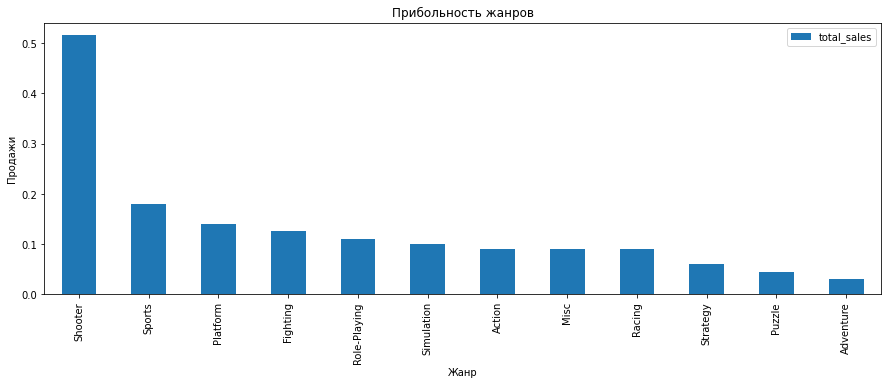

In [35]:
current_period.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(ascending=False, by = 'total_sales').plot(kind = 'bar', figsize=(15,5))
plt.title('Прибольность жанров')
plt.xlabel ('Жанр')
plt.ylabel ('Продажи')
plt.show()

**Прибыльные жанры**
- Shooter
- Sports
- Platform

**Неприбыльные жанры** 
- Adventure
- Puzzle

## Составляем портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

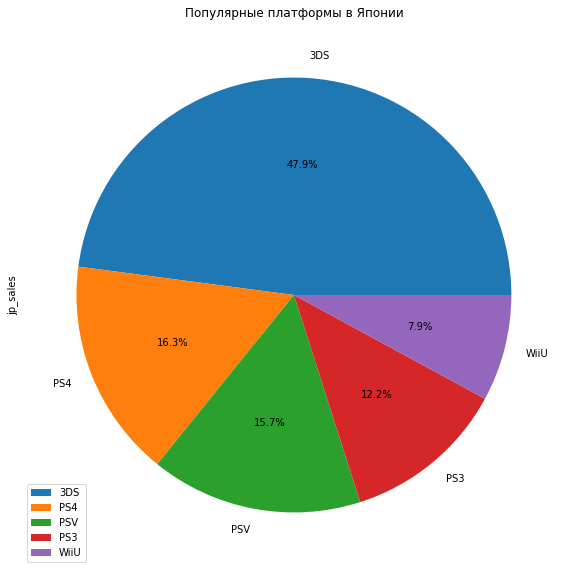

In [36]:
# топ 5 популярных платформ в Японии
top_platform_jp = current_period.pivot_table(
    index='platform', values='jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head(5).plot(kind='pie', figsize=(10,10), y= 'jp_sales',autopct='%1.1f%%')
#top_platform_jp.plot(kind='pie', figsize=(10,10), y= 'jp_sales')
plt.title('Популярные платформы в Японии')
plt.show()

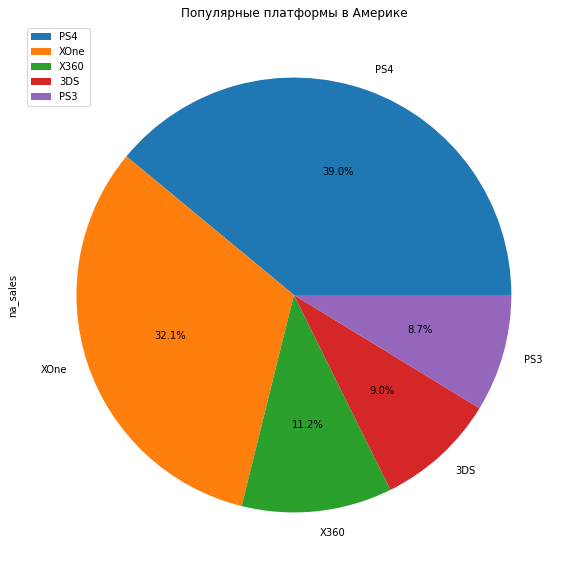

In [37]:
# топ 5 популярных платформ в Северной Америке
top_platform_na = current_period.pivot_table(
    index='platform', values='na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head(5).plot(kind='pie', figsize=(10,10), y= 'na_sales',autopct='%1.1f%%')
#top_platform_na.plot(kind='pie', figsize=(10,10), y= 'na_sales')
plt.title('Популярные платформы в Америке')
plt.show()

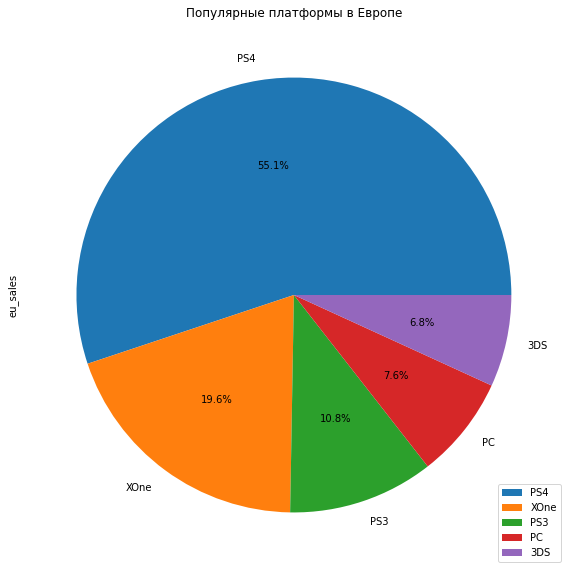

In [38]:
# топ 5 популярных платформ в Европе
top_platform_eu = current_period.pivot_table(
    index='platform', values='eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head(5).plot(kind='pie', figsize=(10,10), y= 'eu_sales',autopct='%1.1f%%')
#top_platform_eu.plot(kind='pie', figsize=(10,10), y= 'eu_sales')
plt.title('Популярные платформы в Европе')
plt.show()

**Отличия в продажах по платформам**
   
   Сразу можно сказать, что у каждого региона преобладает разная платформа, в Японии предпочитают 3DS('Нинтендо'), в Северной Америке и Европе PS4.
   
   Так же хочется отметить, что XOne тоже начинается вливаться в рынок и в дальнейшем игры на этой платформе будут иметь успех.
   
   У пользователей Северной Америке и Европы запросы в целом похожи друг на друга.

### Самые популярные жанры (топ-5)

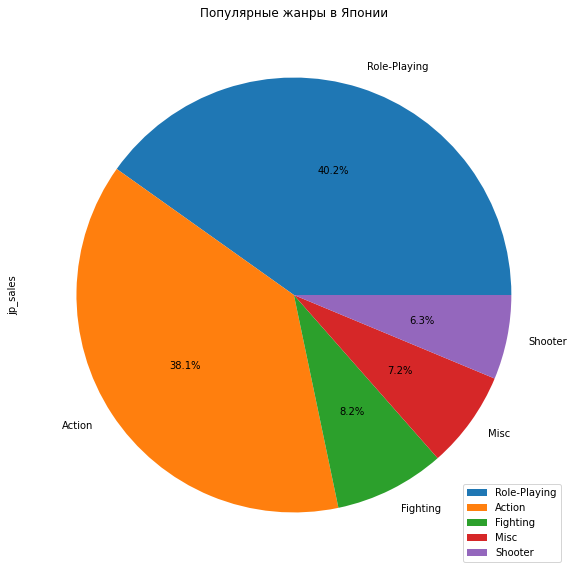

In [39]:
# топ 5 популярных жанров в Японии
current_period.pivot_table(
    index='genre', values='jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head(5).plot(kind='pie', figsize=(10,10), y= 'jp_sales',autopct='%1.1f%%')
plt.title('Популярные жанры в Японии')
plt.show()

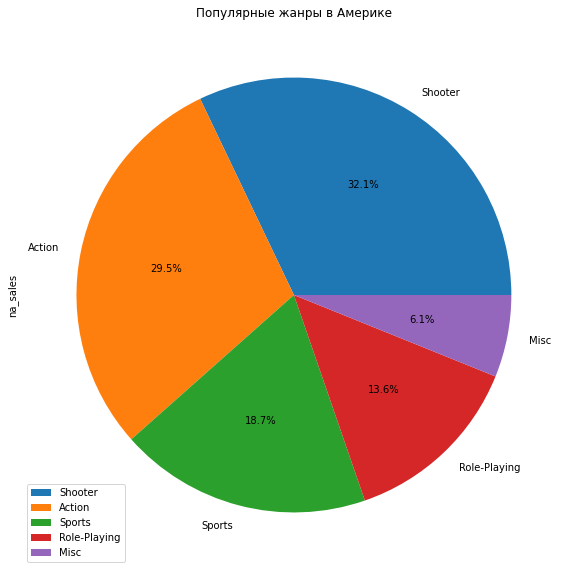

In [40]:
# топ 5 популярных жанров в Северной Америке
current_period.pivot_table(
    index='genre', values='na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head(5).plot(kind='pie', figsize=(10,10), y= 'na_sales',autopct='%1.1f%%')
plt.title('Популярные жанры в Америке')
plt.show()

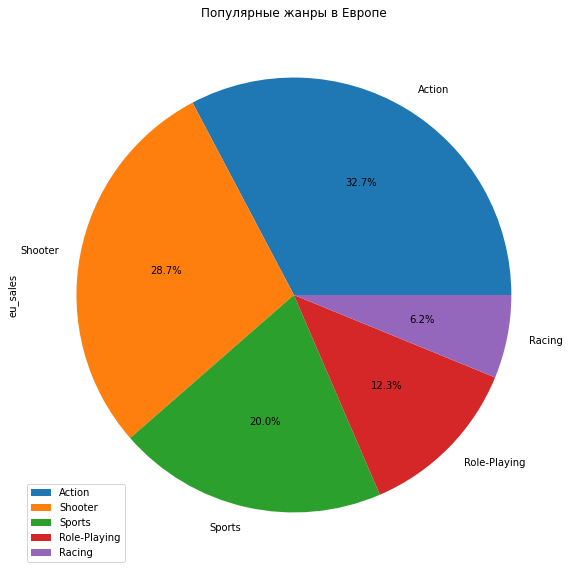

In [41]:
# топ 5 популярных жанров в Европе
current_period.pivot_table(
    index='genre', values='eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head(5).plot(kind='pie', figsize=(10,10), y= 'eu_sales',autopct='%1.1f%%')
plt.title('Популярные жанры в Европе')
plt.show()

**Отличия в продажах по жанрам**
   
   У пользователей Северной Америке и Европы одинаковые предпочтения в жанрах игр с одной лишь разницой, что у Северной Америке Shooter на первом месте, а у Европы Action, но в Японии преобладет жанр игр Role-Playing.

### Влияние рейтинга ESRB на продажи в отдельном регионе

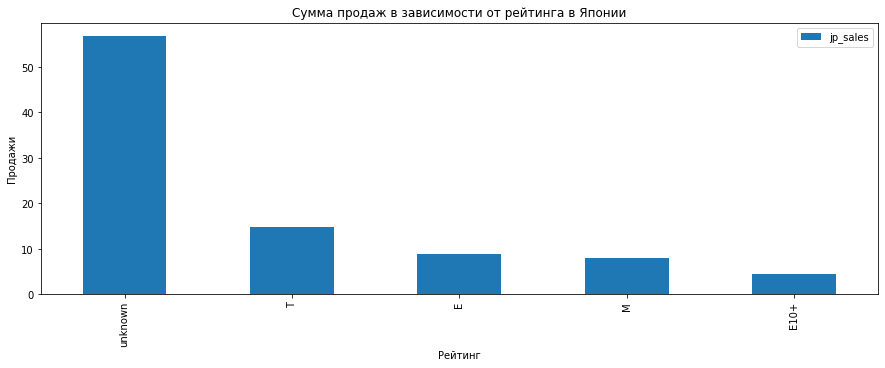

In [42]:
# график зависимости продаж от рейтинга в Японии
current_period.pivot_table(index='rating', values='jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5))
plt.title('Сумма продаж в зависимости от рейтинга в Японии')
plt.xlabel ('Рейтинг')
plt.ylabel ('Продажи')
plt.show()

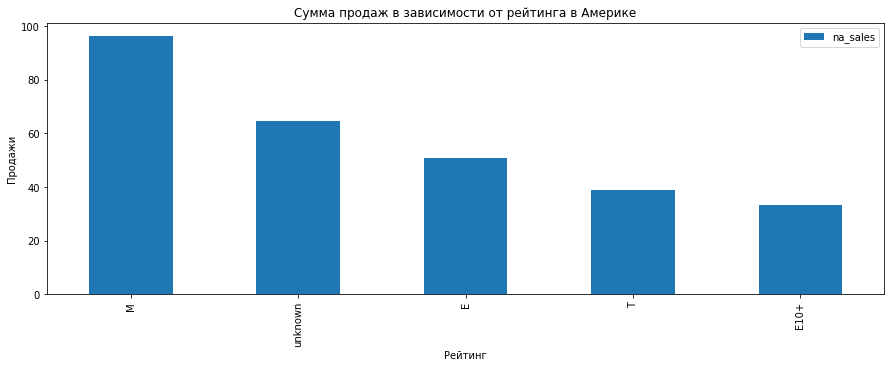

In [43]:
# график зависимости продаж от рейтинга в Северной Америке
current_period.pivot_table(index='rating', values='na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))
plt.title('Сумма продаж в зависимости от рейтинга в Америке')
plt.xlabel ('Рейтинг')
plt.ylabel ('Продажи')
plt.show()

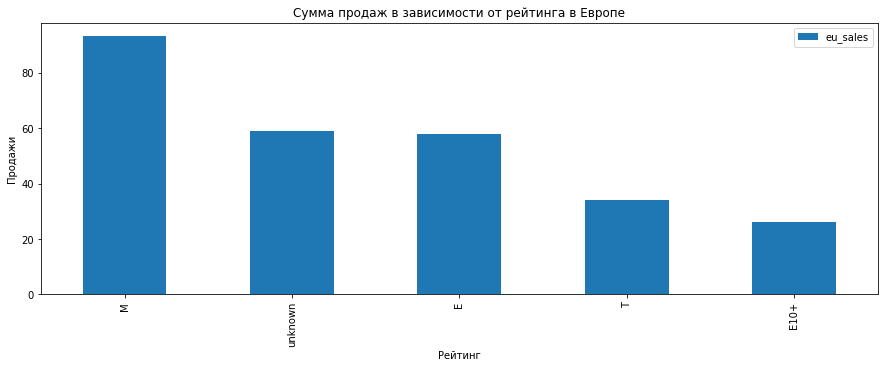

In [44]:
# график зависимости продаж от рейтинга в Европе
current_period.pivot_table(index='rating', values='eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))
plt.title('Сумма продаж в зависимости от рейтинга в Европе')
plt.xlabel ('Рейтинг')
plt.ylabel ('Продажи')
plt.show()

**Влияние рейтинга на продажи в отдельном регионе**
   
   Опять же можно сказать, что пользователи из Северной Америке и Европы очень схожи и игры с рейтингом M имеют самые большие продажи, в Японии же преобладают игры у которых нет рейтинга.

## Провека гипотез


In [45]:
# импорт библиотеки scipy
from scipy import stats as st

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

```
H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H1: Средние пользовательские рейтинги платформ Xbox One и PC разные
alpha = .05
```

In [46]:
xone_test = current_period[(current_period['platform'] == 'XOne') & (current_period['user_score'] >= 0)]['user_score']
pc_test = current_period[(current_period['platform'] == 'PC') & (current_period['user_score'] >= 0)]['user_score']
results = st.ttest_ind(
    xone_test, 
    pc_test,equal_var=False)

alpha = .05 

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.11601545900050317
Не получилось отвергнуть нулевую гипотезу


**Вывод**
   
   Не получилось отвергнуть нулевую гипотезу. Рейтинг платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверка гипотезы: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;

```
H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые
H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)  разные
alpha = .05
```

In [47]:
action_test = current_period[(current_period['genre'] == 'Action') & (current_period['user_score'] >= 0)]['user_score']
sport_test = current_period[(current_period['genre'] == 'Sports') & (current_period['user_score'] >= 0)]['user_score']
results = st.ttest_ind(
    action_test, 
    sport_test,equal_var=False)

alpha = .05 

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825638224397033e-14
Отвергаем нулевую гипотезу


**Вывод**
   
   Отвергаем нулевую гипотезу. Рейтинг платформ Xbox One и PC разные.

**Как сформулировали нулевую и альтернативную гипотезы**

**Какой критерий применили для проверки гипотез и почему**

   Нулевая гипотеза появлась из условий, а альтернативная это противовес нулевой.
Гипотезы проверялись специальным методом проверки о равенстве среднего двух генеральных совокупностей по выборкам.

## Общий вывод


Для каждого региона разные факторы определяющие успешность игры.
Большую роль играет жанр игр, платформы на которой выйдет игра и рейтинг esrb, так же не мало важно для продаж игр сказывается оценка критиков.

Оценка критиков влияет на продажи игры больше чем оценка пользователей, поэтому важно учитывать их мнение чтобы игра имела больше продаж.

Так например для пользователей Северной Америки приобладают такие жанры как:
- Shooter
- Action
- Sports
- Role-Playing	
- Misc

В Европе:
- Action	
- Shooter	
- Sports
- Role-Playing	
- Racing

В Японии:
- Role-Playing
- Action	
- Fighting	
- Misc	
- Shooter

В Северной Америке и Европе вкусы у пользователей похожи выделяются такие жанры Action,Sports,Shooter, а в Японии пользователь предпочитают больше всего Role-Playing. Именно на эти четыре жанра стоит делать упор для успешности игры.Можно смело сказать что пользователи предпочитают актиные игры.
Так же отдельно можно отметить жанр Shooter , потому что он имеет самые стабильные продажи на рынке.

Платформы которые пользуются большой популрностью в Северной Америке:
- PS4
- XOne
- X360	
- 3DS
- PS3	

В Европе:
- PS4
- XOne	
- PS3
- PC
- 3DS

В Японии:
- 3DS	
- PS4	
- PSV	
- PS3
- WiiU

Нужно делать упор на следующие поколение консолей PS4, ХOne, так же нужно обратить внимание на платформу 3DS ('nintendo'), PC ('персональный компьютер).3DS имеет большие продажи в Японии, а PC показывает стабильность. У каждого региона есть тенденция того, что больше всего пользователей пользуются платформами из своих стран это тоже в дальнейшем стоит проанализовать и понять насколько эта теория правдива. 

Так же важный фактор это рейтинг ESRB, категория M ('Для взрослых') находится на первом месте в регионах Северной Америки и Европе, так же категория E ('Для всех') имеет достаточное количетсво продаж и T ('Подросткам'), именно на эти три рейтинга стоит делать упор для успешности игры. Отдельно можно выделить Японию, у который игры которые не имеют рейтинга имеют больше всего продаж, скорее всего у этого региона присутвует своя система оценки рейтинга и стоит отдельно проанализовать этот регион на тему рейтнга игры.

